# Problem Statement:
### Parents often worry about their wards marks in school college but they remain confused sometimes on how much should their ward study to achieve good grades.

### This Project solves this statement and delivers the amount of marks students get and hours they have to study respectively

## Project Aim:
### 1. To take previous data from students of their marks and the average hours they have studied

### 2. Apply a suitable Machine learning Algorithm which predicts the no of hours a student has to study to get their desired marks.

#### Importing of libraries required for EDA and Feature Engineering

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
df = pd.read_csv('data.csv')

In [164]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [165]:
df.shape

(1000, 8)

In [215]:
df_score = pd.read_csv('student_info.csv')

In [216]:
df_score.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


### Merging of the two DataFrames

In [217]:
final_df_2 = pd.merge(df, df_score, left_index=True, right_index=True)

In [219]:
final_df_2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,student_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,6.83,78.50
1,female,group C,some college,standard,completed,69,90,88,6.56,76.74
2,female,group B,master's degree,standard,none,90,95,93,NaN,78.68
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.67,71.82
4,male,group C,some college,standard,none,76,78,75,8.67,84.19
...,...,...,...,...,...,...,...,...,...,...
195,male,group D,associate's degree,standard,none,61,55,52,7.53,81.67
196,male,group C,some high school,free/reduced,completed,59,69,65,8.56,84.68
197,male,group E,high school,free/reduced,none,55,56,51,8.94,86.75
198,female,group B,some college,free/reduced,none,45,53,55,6.60,78.05


## Data Preprocessing Stage

In [220]:
final_df_2.isnull().sum()    #Hnadling missing values in the dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
study_hours                    5
student_marks                  0
dtype: int64

In [221]:
final_df_2.describe()

,math score,reading score,writing score,study_hours,student_marks
count,200.000000,200.000000,200.000000,195.000000,200.00000
mean,64.285000,67.685000,66.415000,6.995949,77.93375
std,15.893293,15.764784,16.232692,1.253060,4.92570
min,0.000000,17.000000,10.000000,5.010000,68.57000
25%,54.000000,55.750000,55.000000,5.775000,73.38500
50%,65.000000,68.000000,68.000000,7.120000,77.71000
75%,75.000000,79.000000,78.000000,8.085000,82.32000
max,100.000000,100.000000,100.000000,8.990000,86.99000


In [222]:
final_df_2.mean()

C:\Users\abhir\AppData\Local\Temp/ipykernel_15972/2952831915.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_df.mean()


math score       64.285000
reading score    67.685000
writing score    66.415000
study_hours       6.995949
student_marks    77.933750
dtype: float64

In [223]:
final_df_2 = final_df_2.fillna(final_df_2['study_hours'].mean())

In [227]:
final_df_2.isnull().sum()  

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
study_hours                    0
student_marks                  0
dtype: int64

In [228]:
final_df_2['gender'].value_counts()

female    100
male      100
Name: gender, dtype: int64

In [229]:
final_df_2['parental level of education'].value_counts()

some college          50
associate's degree    49
some high school      32
high school           30
bachelor's degree     22
master's degree       17
Name: parental level of education, dtype: int64

In [230]:
final_df_2['race/ethnicity'].value_counts()

group C    60
group D    51
group B    45
group E    27
group A    17
Name: race/ethnicity, dtype: int64

In [231]:
final_df_2['lunch'].value_counts()

standard        128
free/reduced     72
Name: lunch, dtype: int64

In [232]:
final_df_2['test preparation course'].value_counts()

none         127
completed     73
Name: test preparation course, dtype: int64

In [233]:
final_df_2['total'] = df['math score'] + df['reading score'] + df['writing score']

In [234]:
final_df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,student_marks,total
0,female,group B,bachelor's degree,standard,none,72,72,74,6.830000,78.50,218
1,female,group C,some college,standard,completed,69,90,88,6.560000,76.74,247
2,female,group B,master's degree,standard,none,90,95,93,6.995949,78.68,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.670000,71.82,148
4,male,group C,some college,standard,none,76,78,75,8.670000,84.19,229


In [235]:
final_df_2['average'] = final_df_2['total']/3
final_df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,student_marks,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,6.830000,78.50,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,6.560000,76.74,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,6.995949,78.68,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.670000,71.82,148,49.333333
4,male,group C,some college,standard,none,76,78,75,8.670000,84.19,229,76.333333


C:\Users\abhir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

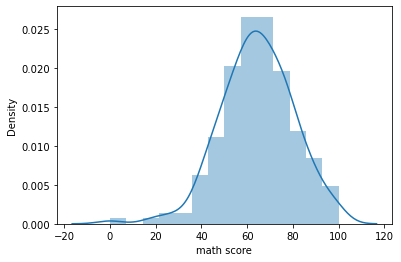

In [236]:
sns.distplot(final_df_2['math score'])

C:\Users\abhir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

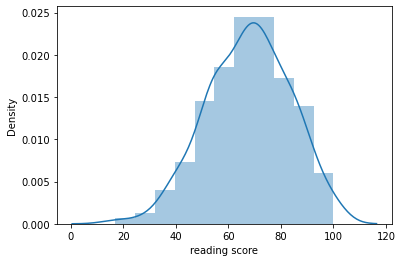

In [237]:
sns.distplot(final_df_2['reading score'])

C:\Users\abhir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

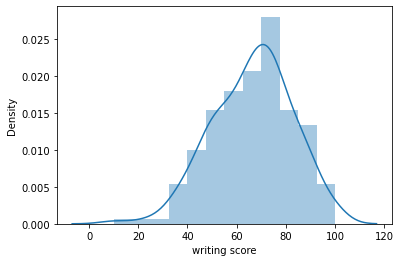

In [238]:
sns.distplot(final_df_2['writing score'])

C:\Users\abhir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average', ylabel='Density'>

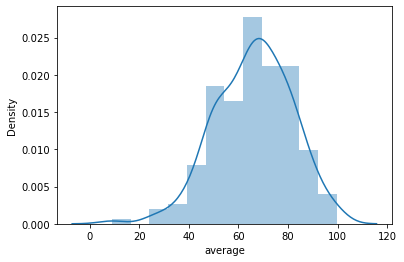

In [239]:
sns.distplot(final_df_2['average'])

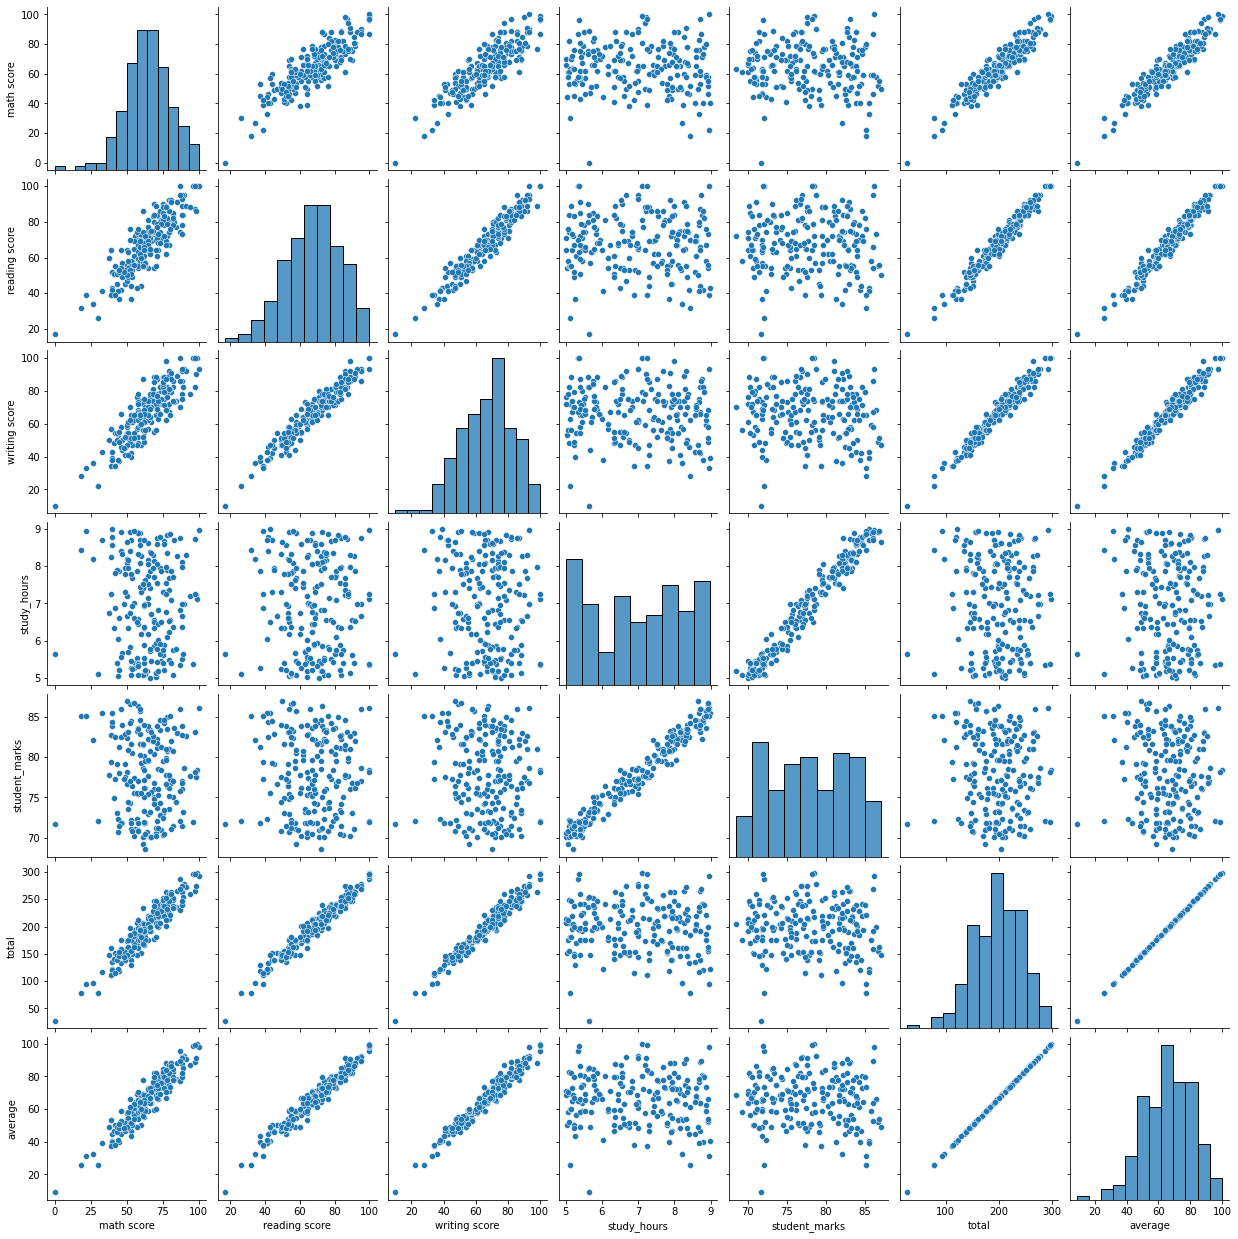

In [240]:
sns.pairplot(final_df_2)

C:\Users\abhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='average'>

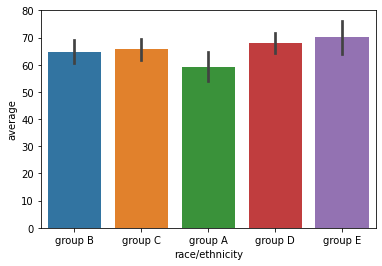

In [241]:
sns.barplot(final_df_2['race/ethnicity'],final_df_2['average'])

### In this Observation , the Group C students have score the highest marks on average and Group A have the least

C:\Users\abhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parental level of education', ylabel='average'>

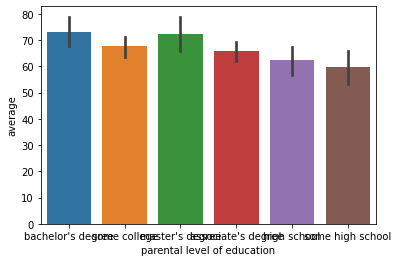

In [242]:
sns.barplot(final_df_2['parental level of education'], final_df_2['average'])


C:\Users\abhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test preparation course', ylabel='average'>

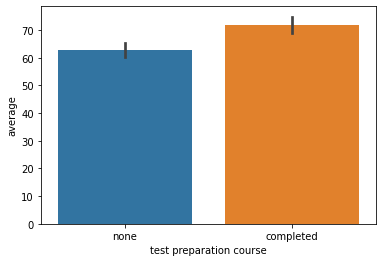

In [243]:
sns.barplot(final_df_2['test preparation course'], final_df_2['average'])

In [244]:
final_df_2['Math_Students_Passed'] = np.where(final_df_2['math score'] < 40, 'Fail', 'Pass' )

In [245]:
final_df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,student_marks,total,average,Math_Students_Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,6.830000,78.50,218,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,6.560000,76.74,247,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,6.995949,78.68,278,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.670000,71.82,148,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,8.670000,84.19,229,76.333333,Pass


In [246]:
final_df_2['Reading_Students_Passed'] = np.where(final_df_2['math score'] < 40, 'Fail', 'Pass' )

In [247]:
final_df_2['Writing_Students_Passed'] = np.where(final_df_2['math score'] < 40, 'Fail', 'Pass' )

In [248]:
final_df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,student_marks,total,average,Math_Students_Passed,Reading_Students_Passed,Writing_Students_Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,6.830000,78.50,218,72.666667,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,6.560000,76.74,247,82.333333,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,6.995949,78.68,278,92.666667,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.670000,71.82,148,49.333333,Pass,Pass,Pass
4,male,group C,some college,standard,none,76,78,75,8.670000,84.19,229,76.333333,Pass,Pass,Pass


In [249]:
final_df_2['Math_Students_Passed'].value_counts()

Pass    191
Fail      9
Name: Math_Students_Passed, dtype: int64

In [250]:
final_df_2.shape

(200, 15)

### Due to this project being my first industry level work, i will drop very other parameter and feature from the dataset except Average Marks out of 100 and their study hours

In [251]:
final_df_2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,student_marks,total,average,Math_Students_Passed,Reading_Students_Passed,Writing_Students_Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,6.830000,78.50,218,72.666667,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,6.560000,76.74,247,82.333333,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,6.995949,78.68,278,92.666667,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.670000,71.82,148,49.333333,Pass,Pass,Pass
4,male,group C,some college,standard,none,76,78,75,8.670000,84.19,229,76.333333,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,male,group D,associate's degree,standard,none,61,55,52,7.530000,81.67,168,56.000000,Pass,Pass,Pass
196,male,group C,some high school,free/reduced,completed,59,69,65,8.560000,84.68,193,64.333333,Pass,Pass,Pass
197,male,group E,high school,free/reduced,none,55,56,51,8.940000,86.75,162,54.000000,Pass,Pass,Pass
198,female,group B,some college,free/reduced,none,45,53,55,6.600000,78.05,153,51.000000,Pass,Pass,Pass


In [252]:
final_df_2.drop('gender', axis=1, inplace=True)

In [253]:
final_df_2.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,study_hours,student_marks,total,average,Math_Students_Passed,Reading_Students_Passed,Writing_Students_Passed
0,group B,bachelor's degree,standard,none,72,72,74,6.830000,78.50,218,72.666667,Pass,Pass,Pass
1,group C,some college,standard,completed,69,90,88,6.560000,76.74,247,82.333333,Pass,Pass,Pass
2,group B,master's degree,standard,none,90,95,93,6.995949,78.68,278,92.666667,Pass,Pass,Pass
3,group A,associate's degree,free/reduced,none,47,57,44,5.670000,71.82,148,49.333333,Pass,Pass,Pass
4,group C,some college,standard,none,76,78,75,8.670000,84.19,229,76.333333,Pass,Pass,Pass


In [254]:
final_df_2.drop('reading score', axis=1, inplace=True)
final_df_2.drop('math score', axis=1, inplace=True)
final_df_2.drop('test preparation course', axis=1, inplace=True)
final_df_2.drop('lunch', axis=1, inplace=True)
final_df_2.drop('parental level of education', axis=1, inplace=True)
final_df_2.drop('race/ethnicity', axis=1, inplace=True)

In [255]:
final_df_2.drop('writing score', axis=1, inplace=True)
final_df_2.drop('total', axis=1, inplace=True)
final_df_2.drop('Math_Students_Passed', axis=1, inplace=True)
final_df_2.drop('Reading_Students_Passed', axis=1, inplace=True)
final_df_2.drop('Writing_Students_Passed', axis=1, inplace = True)

In [257]:
final_df_2.drop('average', axis=1, inplace = True)

In [258]:
final_df_2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [259]:
final_df_2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [260]:
final_df_2_copy = final_df_2

In [261]:
final_df_2_copy.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


# Machine Learning Model Implementation of Student Marks Predictor

### Splitting Dataset into X and Y

In [263]:
X = final_df_2_copy.drop('student_marks', axis=1)
y = final_df_2_copy.drop('study_hours', axis=1)

In [264]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


### Train Test Split

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [266]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


# Model Selection and Training

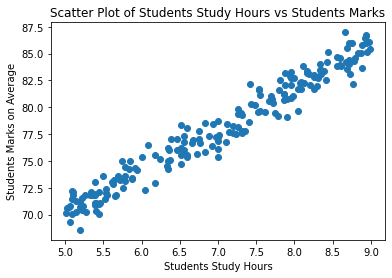

In [268]:
plt.scatter(x=final_df_2.study_hours, y=final_df_2.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students Marks on Average")
plt.title("Scatter Plot of Students Study Hours vs Students Marks")
plt.show()

### As we can see in the Graph , there is a direct linear correlation between the two features and thereby we can apply Linear Regression algorithm for the model training 

### For Linear Regression , The mathematical intuition for it is y = m * x + C

In [271]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()

In [272]:
my_model.fit(X_train, y_train)

LinearRegression()

### Coefficient Value for the Data - 'm'

In [273]:
my_model.coef_

array([[3.93571802]])

### Intercept Value for the Data = 'C'

In [275]:
my_model.intercept_

array([50.44735504])

In [276]:
m = 3.93
c = 50.44

y = m * 6 + c

In [282]:
y

74.02

### Predictions

In [285]:
my_model.predict([[6]])[0][0].round(2)

74.06

In [287]:
y_pred = my_model.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

## Accuracy Checking of our Model

In [288]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=['Study Hours', 'Student_Original_Marks', 'Student_Predicted_Marks'])

,Study Hours,Student_Original_Marks,Student_Predicted_Marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## As we can see, the predictions of this model with respect to the original data 

# Testing Model Accuracy - Fine Tuning

In [293]:
Accuracy = my_model.score(X_test,y_test)
print("The Accuracy of the Model is: ", (Accuracy * 100).round(2),"%")

The Accuracy of the Model is:  95.14 %


## Saving the ML Model

In [294]:
import joblib
joblib.dump(my_model, 'Student_mark_predictor_model.pkl')

['Student_mark_predictor_model.pkl']